In [1]:
import numpy as np, scipy, matplotlib.pyplot as plt, pandas, librosa,sklearn,IPython.display as ipd
import matplotlib.style as ms
import librosa
import os, sys
import numpy
from scipy.fftpack import fft
ms.use('seaborn-muted')
%matplotlib inline

/Users/m.gorbushin/anaconda2/lib/python2.7/site-packages/numexpr/cpuinfo.py:76: UserWarning: [Errno 2] No such file or directory
  stacklevel=stacklevel + 1):


Пример композиции двух колебаний и их дискретезации:

In [2]:
T = 1 # seconds
f0 = 1000
sr = 22050
t = np.linspace(0, T, int(T*sr), endpoint=False) # time variable
x1 = 0.1*np.sin(2*np.pi*t * f0)
ipd.Audio(x1, rate=sr)

Эта нота представляет из себя волну(периодическую функцию) с определенной частотой

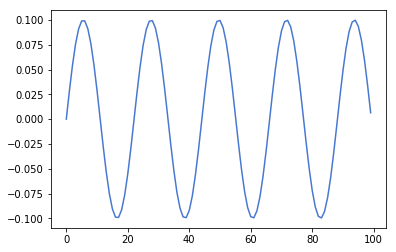

In [3]:
plt.plot(x1[:100])

Зададим еще одну ноту уже с другой частотой

In [4]:
T = 1 # seconds
f0_ = 2047.0
sr = 22050
t = numpy.linspace(0, T, int(T*sr), endpoint=False) # time variable
x2 = 0.5*numpy.sin(2*numpy.pi*f0_*t)
ipd.Audio(x2, rate=sr)

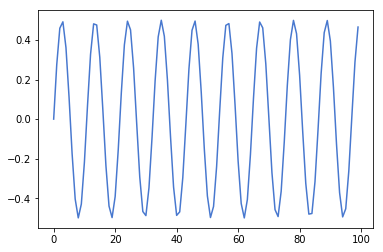

In [5]:
plt.plot(x2[:100])

Представим, что играют две эти ноты одновременно, как тогда будет выглядеть колебание

In [6]:
x12 = x1 + x2

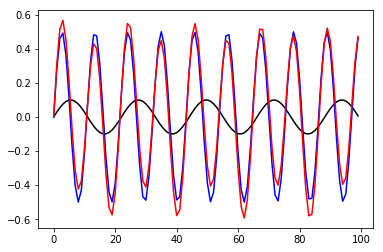

In [7]:
plt.plot(x1[:100], color = 'black')
plt.plot(x2[:100], color = 'blue')
plt.plot(x12[:100], color = 'red')

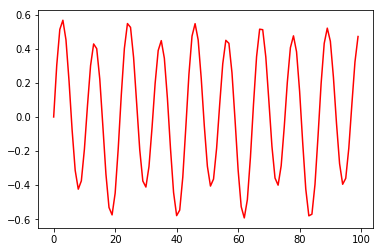

In [8]:
plt.plot(x12[:100], color = 'red')

Воспроизведу две эти ноты одновременно

In [9]:
ipd.Audio(x12, rate=sr)

Используем FFT и построим спектр для первой волны

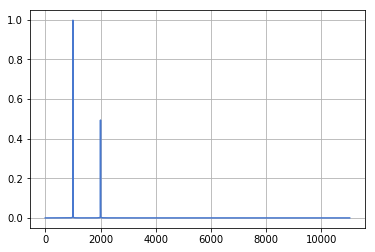

In [10]:
# Number of sample points
N = 22050
# sample spacing
T = 1.0 / 22050.0
x = np.linspace(0.0, N*T, N)
y = np.sin(1000.0 * 2.0*np.pi*x) + 0.5*np.sin(2000.0 * 2.0*np.pi*x)
yf = fft(y)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

(22050,)
(22050,)


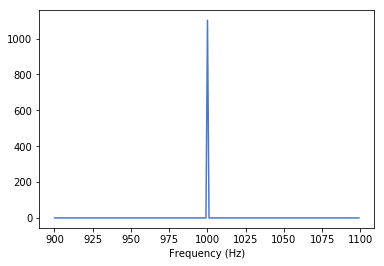

In [11]:
X = scipy.fft(x1)
X_mag = numpy.absolute(X)        # spectral magnitude
f = numpy.linspace(0, sr, 22050) # frequency variable
print X_mag.shape
print f.shape
plt.plot(f[900:1100], X_mag[900:1100]) # magnitude spectrum
plt.xlabel('Frequency (Hz)')

FFT для второй волны

(22050,)
(22050,)


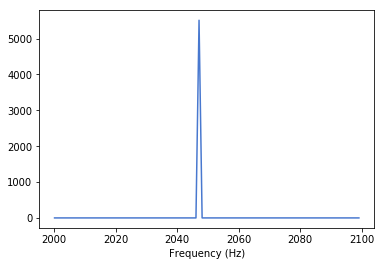

In [12]:
X = scipy.fft(x2)
X_mag = numpy.absolute(X)        # spectral magnitude
f = numpy.linspace(0, sr, 22050) # frequency variable
print X_mag.shape
print f.shape
plt.plot(f[2000:2100], X_mag[2000:2100]) # magnitude spectrum
plt.xlabel('Frequency (Hz)')
#plt.plot(X_mag) # magnitude spectrum

FFT для суммы волн

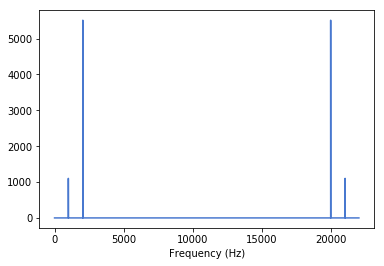

In [13]:
X = scipy.fft(x12)
X_mag = numpy.absolute(X)        # spectral magnitude
f = numpy.linspace(0, sr, 22050)  # frequency variable
plt.plot(f, X_mag) # magnitude spectrum
plt.xlabel('Frequency (Hz)')

Как будет выглядеть Спектрограмма для звука состоящего сначала из первой ноты, а потом из второй?

In [14]:
x_full = np.concatenate([x1[:4096], x2[:4096]])

В первую секунду волна колеблится с частотой первой ноты, а вторую секунду с частотой второй ноты

In [15]:
ipd.Audio(x_full, rate=sr)

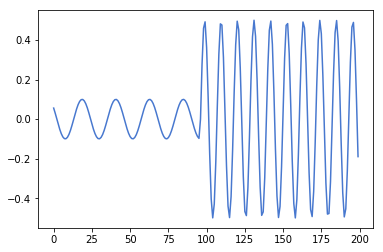

In [16]:
n0 = 4000
n1 = 4200
plt.plot(x_full[n0:n1])

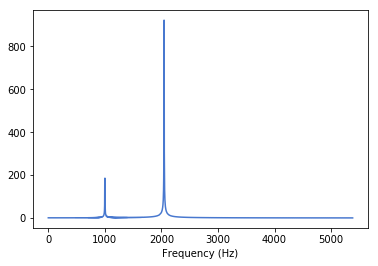

In [17]:
X_ = scipy.fft(x_full)
X_mag_ = numpy.absolute(X_)        # spectral magnitude
f_ = numpy.linspace(0, sr, 8192)  # frequency variable
plt.plot(f_[:2000], X_mag_[:2000]) # magnitude spectrum
plt.xlabel('Frequency (Hz)')

Спектрограмма последовательного воспроизведения нот совпадает с спектрограммой их одновременного звучания.

Итак, в процессе оцифровки звука мы разбиваем каждую сегунду на 44000 коротких участка (частота дискретизации), сэмпла. И для каждого из них произведем FFT.

# Анализ классов

Посмотрим насколько отличаются песни из разных жанров

In [52]:
s_r = 44100
x = []
genre_names = ["Metall", "Classical", "Hiphop", "Rock"]
tmp,sr=librosa.load("/Users/m.gorbushin/project/tmp/metall_5.wav",sr=s_r,mono=True,duration=5.0)
x.append(tmp)
tmp,sr=librosa.load("/Users/m.gorbushin/project/tmp/classical_5.wav",sr=s_r,mono=True,duration=5.0)
x.append(tmp)
tmp,sr=librosa.load("/Users/m.gorbushin/project/tmp/hiphop_5.wav",sr=s_r,mono=True,duration=5.0)
x.append(tmp)
tmp,sr=librosa.load("/Users/m.gorbushin/project/tmp/rock_5.wav",sr=s_r,mono=True,duration=5.0)
x.append(tmp)

# Как выглядит сигнал от времени

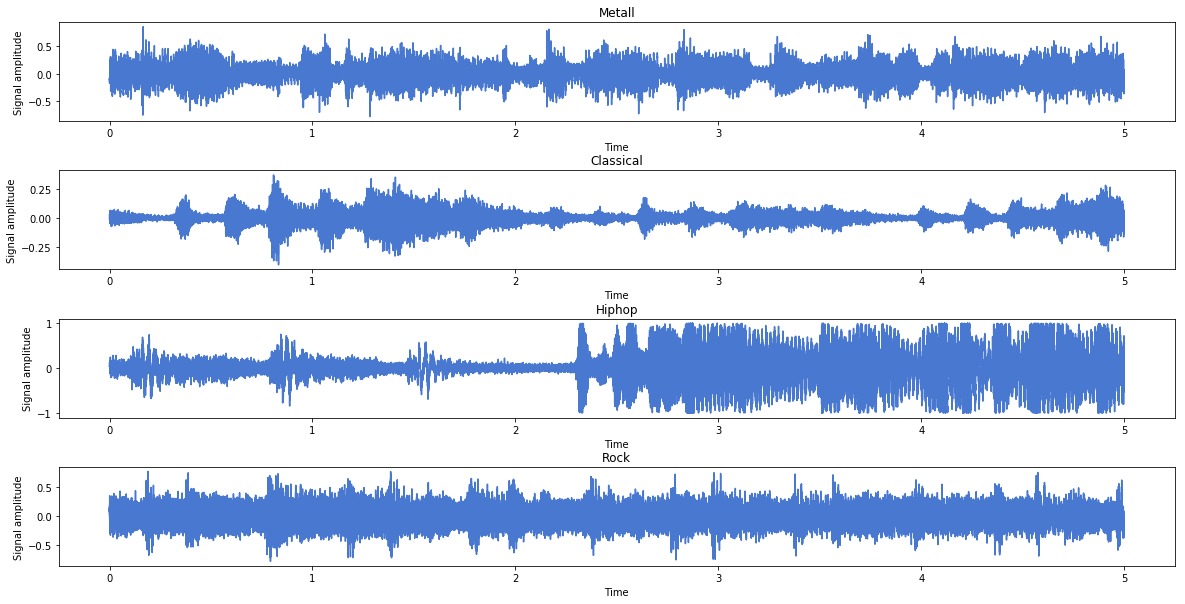

In [53]:
fig=plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=.5)
time_coord = np.linspace(0, 5, len(tmp))
plt.plot(time_coord, tmp)

for index, signal in enumerate(x):
    plt.subplot(4, 1, index + 1)
    plt.title(genre_names[index])
    plt.xlabel("Time")
    plt.ylabel("Signal amplitude")
    plt.plot(time_coord, signal)

# Как выглядит преобразование Фурье для этих сигналов

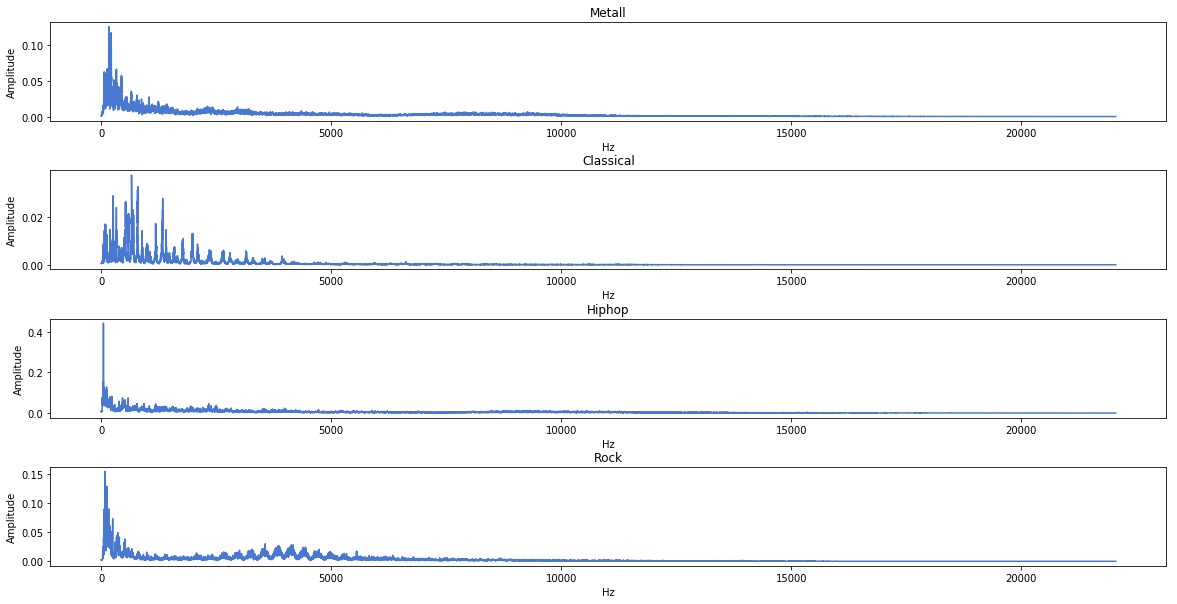

In [19]:

fig=plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=.5)
hz = np.linspace(1, s_r // 2, s_r // 2)
seconds = 5
x_res = []
for genre_index in xrange(0, 4):
    x_res.append(np.zeros(s_r, dtype=np.float))
    for second in xrange(0, seconds):
        x_genre_fft = fft(x[genre_index][s_r * second : s_r * (second + 1)])
        x_genre_fft_abs = np.abs(x_genre_fft)
        x_res[genre_index] += x_genre_fft_abs
        
    plt.subplot(4, 1, genre_index + 1)
    plt.title(genre_names[genre_index])
    plt.xlabel("Hz")
    plt.ylabel("Amplitude")
    plt.plot(hz, 2.0 / s_r * x_res[genre_index][:s_r//2])

# Отсортируем частоты (возьмем только первые 10000)

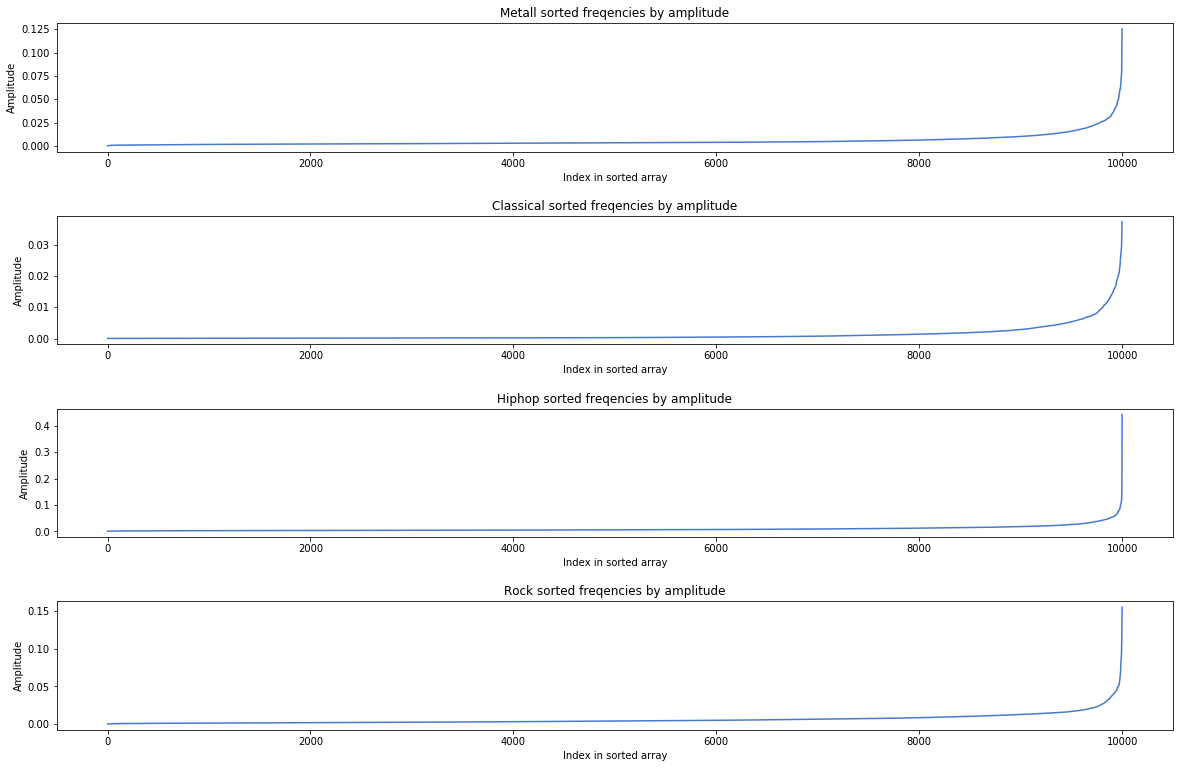

In [20]:
max_hz = 10000
sort_amplitude = []
median = []
hz_for_sort = np.linspace(0, max_hz, max_hz)

fig=plt.figure(figsize=(20,13))
fig.subplots_adjust(hspace=.5)


for genre_index in xrange(0, 4):
    sort_amplitude.append(np.sort(x_res[genre_index][0:max_hz]))
    median.append(np.median(sort_amplitude[genre_index]))
    
    plt.subplot(4, 1, genre_index + 1)
    plt.title(genre_names[genre_index] + " sorted freqencies by amplitude")
    plt.xlabel("Index in sorted array")
    plt.ylabel("Amplitude")
    plt.plot(hz_for_sort, 2.0 / s_r * sort_amplitude[genre_index])

# Может брать площадь под графиком таких штук?

# Найдем матожидание частоты

In [21]:
expected_value = []
for genre_index in xrange(0, 4):
    amp_norm = x_res[genre_index][:s_r//2] / np.sum(x_res[genre_index][:s_r//2])
    expected_value.append(np.sum(amp_norm * hz))
expected_value

[4014.4443416950999,
 2115.9993833023736,
 4717.1258172429552,
 3966.9178463938169]

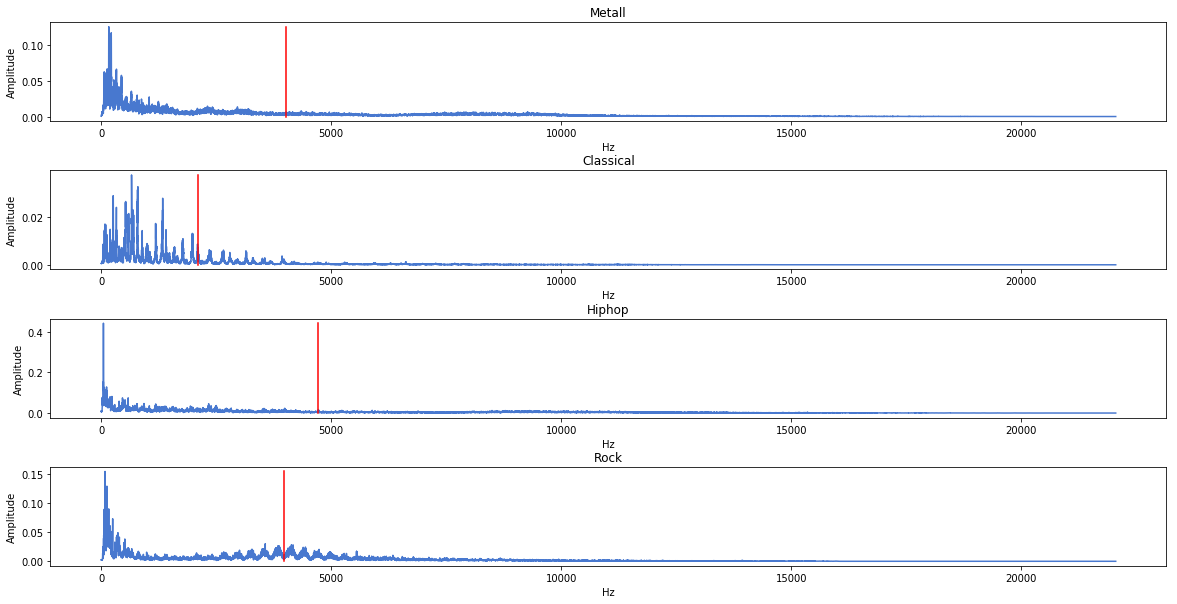

In [22]:
fig=plt.figure(figsize=(20,10))
fig.subplots_adjust(hspace=.5)

hz_middle = []
amplitude_middle = []

for genre_index in xrange(0, 4):
    plt.subplot(4, 1, genre_index + 1)
    plt.title(genre_names[genre_index])
    plt.xlabel("Hz")
    plt.ylabel("Amplitude")
    plt.plot(hz, 2.0 / s_r * x_res[genre_index][:s_r//2])
    amplitude_middle.append(np.sum(hz * 2.0 / s_r * x_res[genre_index][:s_r//2]) / np.sum(hz))
    plt.plot(np.full((100,), expected_value[genre_index]), np.linspace(0, np.max(2.0 / s_r * x_res[genre_index][:s_r//2]), 100), 'r')

In [23]:
# экранируем 
def escape(string):
    string = string.replace(" ", "\ ")
    string = string.replace("(", "\(")
    string = string.replace(")", "\)")
    string = string.replace("&", "\&")
    string = string.replace("'", "\'")
    return string

def get_all_files_in_folder(base_path):
    files = os.listdir(base_path)
    result = []
    for file_item in files:
        file_path = base_path + '/' + file_item
        if (os.path.isdir(file_path)):
            result.extend(get_all_files_in_folder(file_path))
        else:
            result.append(escape(file_path))
    return result

In [24]:
ffmpeg = False
if (ffmpeg):
    raw_data_path = "/Users/m.gorbushin/Downloads/music"
    wav_data_path = "/Users/m.gorbushin/project/train_data_wav"
    genres_folders_names = ["rock", "hiphop", "classical", "metall"]
    count = 0
    for genre in genres_folders_names:
        path = raw_data_path + '/' + genre
        print "Start analyze ", path
        files_in_dir = get_all_files_in_folder(path)
        print "Get ", len(files_in_dir), " files"
        os.system('mkdir ' + wav_data_path + '/' + genre)
        count = 0
        for file_path in files_in_dir:
            save_path_tmp = wav_data_path + '/' + genre + '/' + `count` + 'tmp.wav'
            save_path = wav_data_path + '/' + genre + '/' + `count` + '.wav'
            os.system("ffmpeg -i " + file_path + " -ac 1 -ar 44100 -f wav -y " + save_path_tmp)
            os.system("ffmpeg -ss 30 -i " + save_path_tmp + " -t 5 " + save_path)
            os.system("rm " + save_path_tmp)
            count += 1
            sys.stdout.write('\r' + `count` + "/" + `len(files_in_dir)`)
        sys.stdout.write('\n')

# Попробуем сделать преобразование фурье в окне длинной 1с и взять матожидание частоты в каждом окне

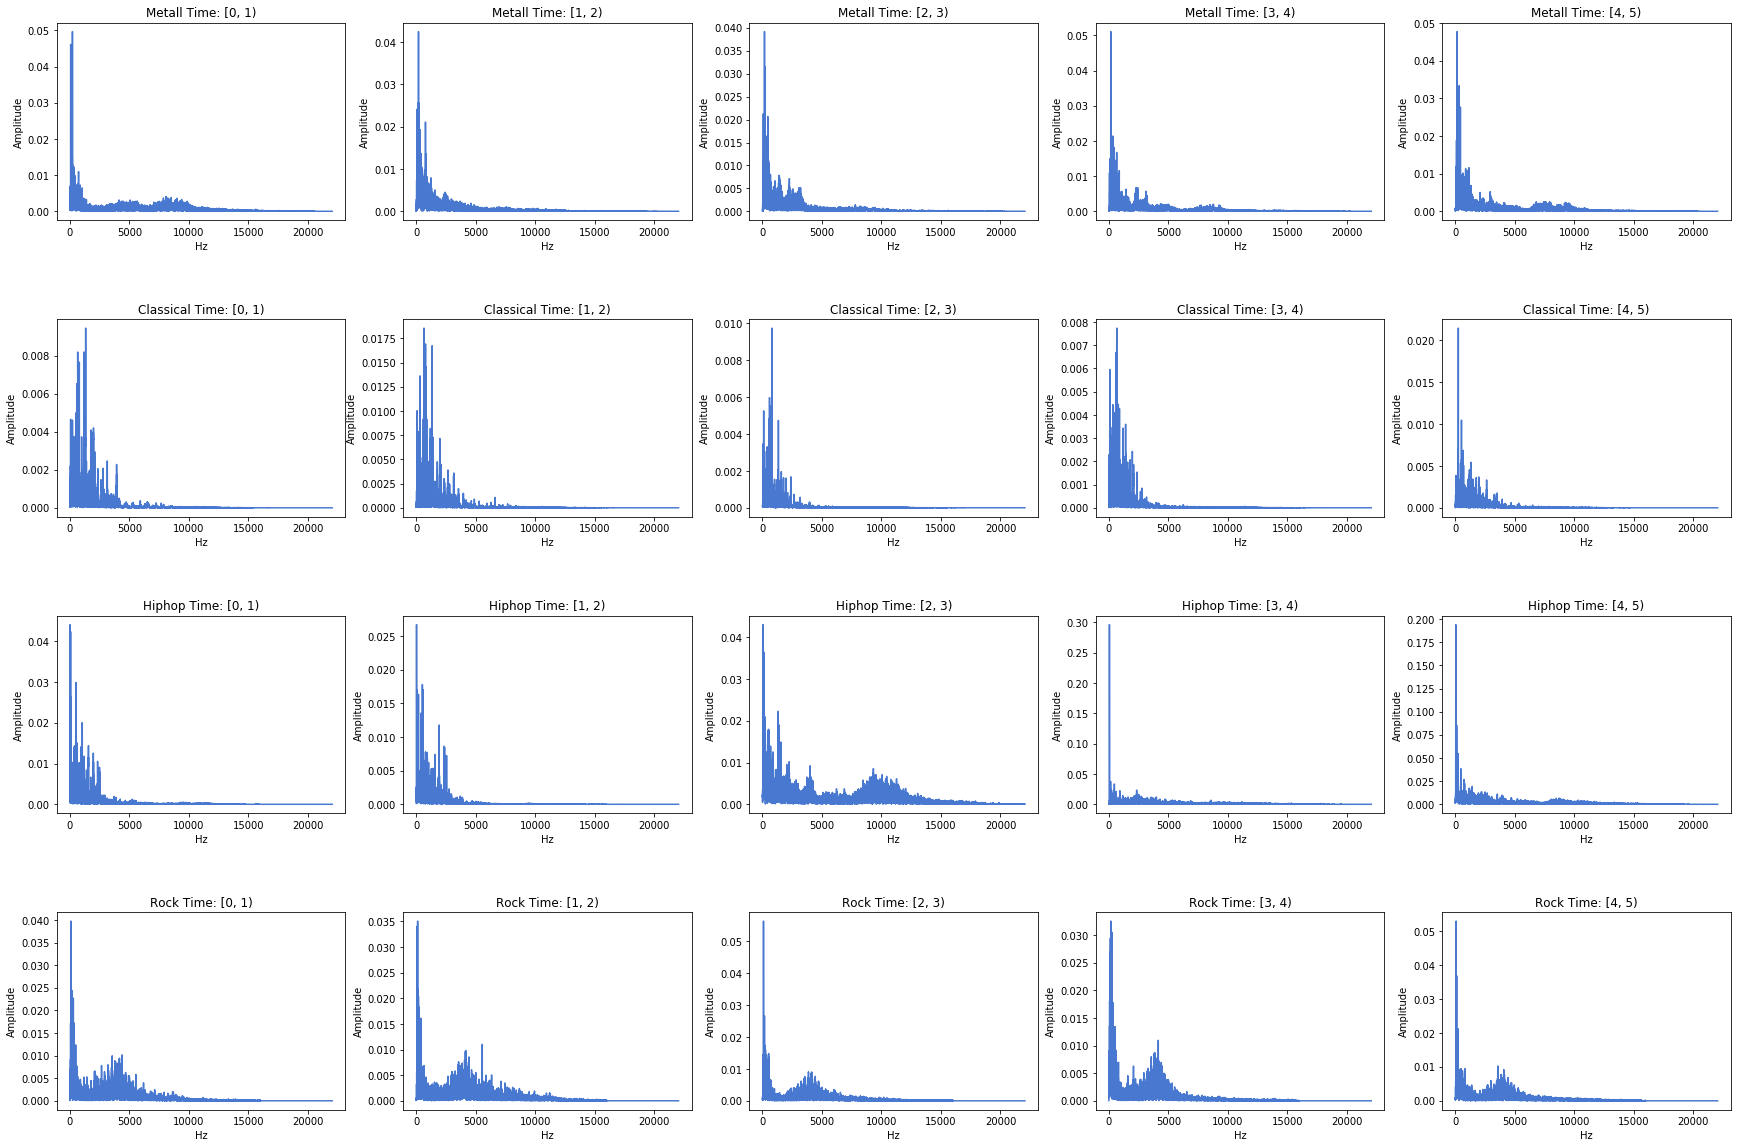

In [25]:
fig=plt.figure(figsize=(30,20))
fig.subplots_adjust(hspace=.5)
hz = np.linspace(1, s_r // 2, s_r // 2)
seconds = 5

plot_cnt = 1

x_res_split_seconds = []
for genre_index in xrange(0, 4):
    x_res_split_seconds.append(np.zeros((seconds, s_r), dtype=np.float))
    for second in xrange(0, seconds):
        x_genre_fft = fft(x[genre_index][s_r * second : s_r * (second + 1)])
        x_genre_fft_abs = np.abs(x_genre_fft)
        x_res_split_seconds[genre_index][second] = x_genre_fft_abs
        
        plt.subplot(4, 5, plot_cnt)
        plot_cnt += 1
        plt.title(genre_names[genre_index] + " Time: [%d, %d)" % (second, second + 1))
        plt.xlabel("Hz")
        plt.ylabel("Amplitude")
        plt.plot(hz, 2.0 / s_r * x_genre_fft_abs[:s_r//2])

# Построим матожидание в каждом участке

In [26]:
expected_value_split_seconds = np.zeros((len(genre_names), seconds))
for genre_index in xrange(0, 4):
    for second in range(0, seconds):
        
        # Получаем значение fft у жанра genre_index, за секунду - second
        fft_second = x_res_split_seconds[genre_index][second][:s_r//2]
        # Берем сумму
        all_sum_second = np.sum(x_res_split_seconds[genre_index][second][:s_r//2])
        # Получаем числа от 0 до 1, в сумме дающие 1
        amp_norm = fft_second / all_sum_second
        
        # Считаем матожидания частоты, считая, что у нам в amp_norm стоят вероятности
        expected_value_split_seconds[genre_index][second] = np.sum(amp_norm * hz)

expected_value_split_seconds

array([[ 5478.72862734,  2934.14707075,  3222.95899787,  3938.73809861,
         4116.82661547],
       [ 2102.63643973,  2187.72923833,  2088.34488665,  1956.2480583 ,
         2134.19176157],
       [ 2224.59251317,  1860.34609839,  5800.47007653,  4932.67200054,
         4556.57865351],
       [ 3896.13322817,  4348.20632106,  4031.31710846,  3575.77727149,
         3901.45971717]])

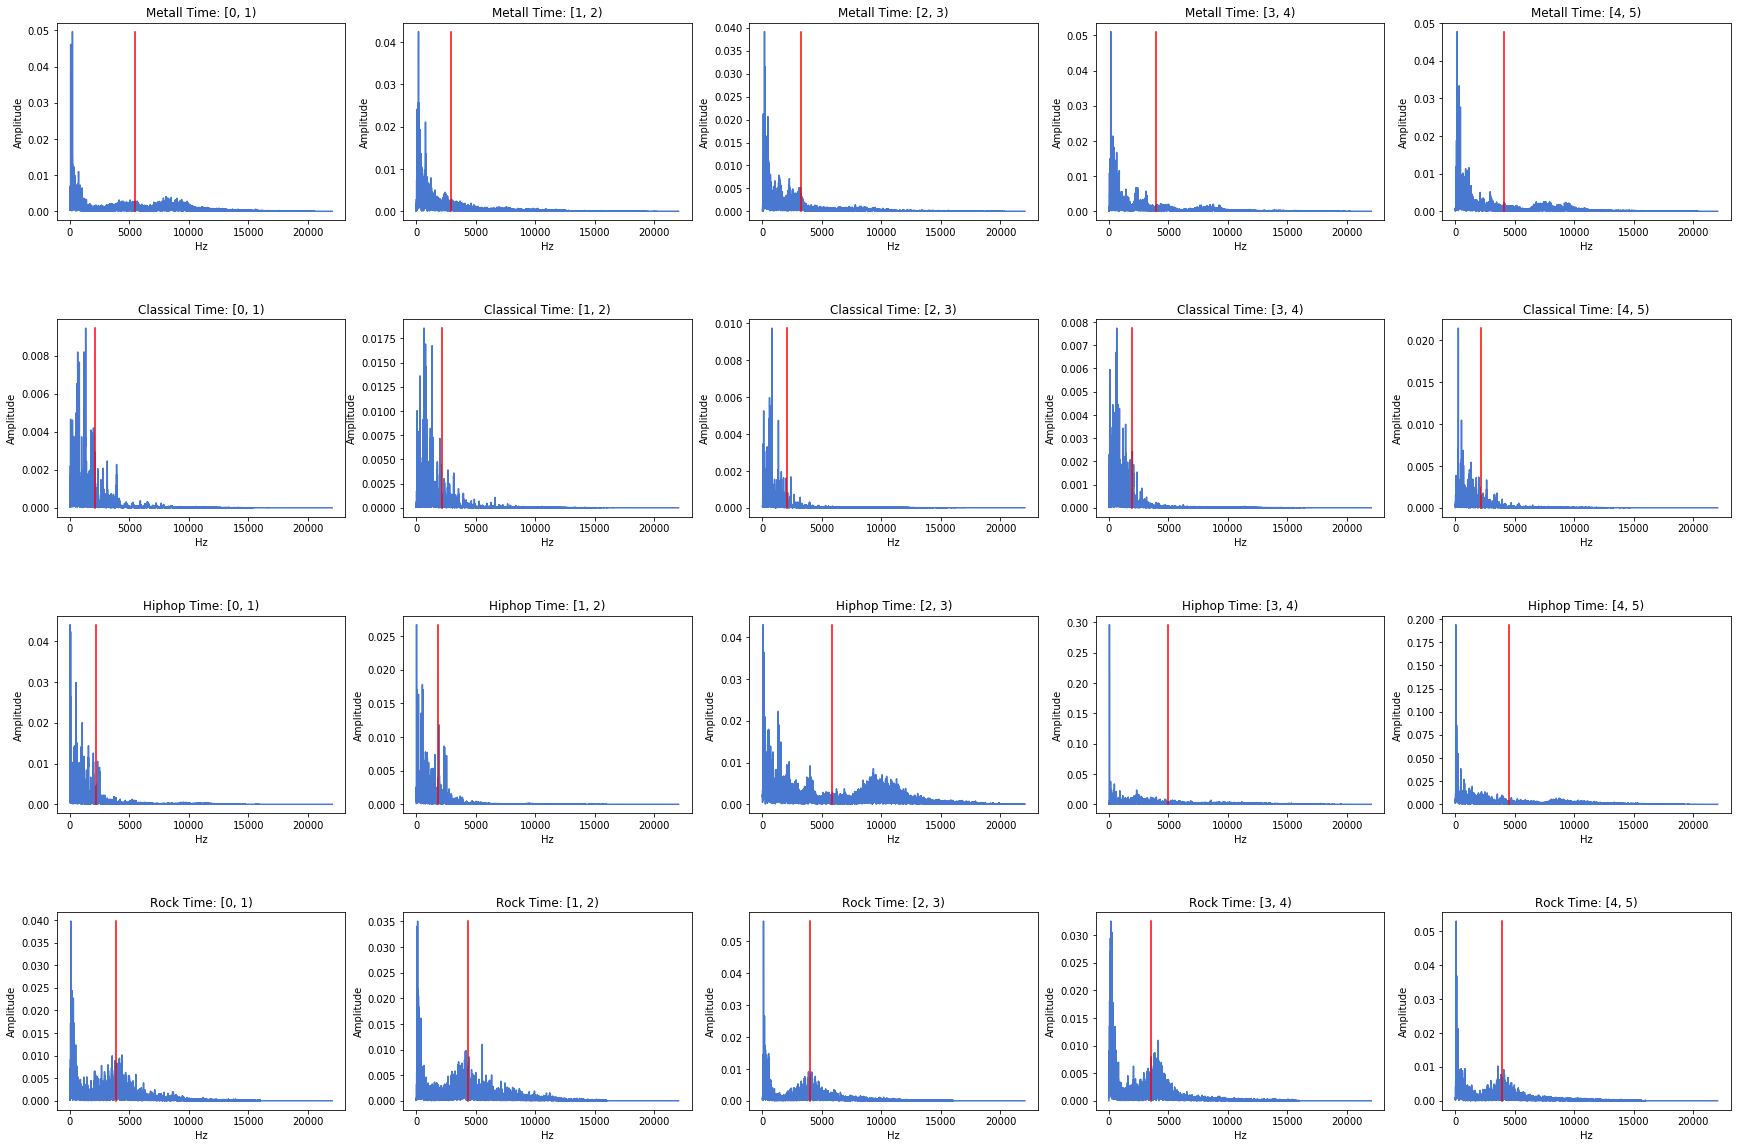

In [27]:
fig=plt.figure(figsize=(30,20))
fig.subplots_adjust(hspace=.5)

hz_middle = []
plot_cnt = 1

for genre_index in xrange(0, 4):
    for second in range(0, seconds):
        plt.subplot(4, 5, plot_cnt)
        plot_cnt += 1
        plt.title(genre_names[genre_index] + " Time: [%d, %d)" % (second, second + 1))
        plt.xlabel("Hz")
        plt.ylabel("Amplitude")
        plt.plot(hz, 2.0 / s_r * x_res_split_seconds[genre_index][second][:s_r//2])
        plt.plot(np.full((100,), 
                         expected_value_split_seconds[genre_index][second]), 
                 np.linspace(0, np.max(2.0 / s_r * x_res_split_seconds[genre_index][second][:s_r//2]), 100), 
                 'r')

# Извлечем наши признаки из тестовой выборки

In [54]:
hz = np.linspace(1, s_r // 2, s_r // 2)
seconds = 5

# Возвращает массив числовых признаков
def extraxt_features_from_signal(signal):
    
    #print len(signal)
    
    features = []
    
    all_fft = np.zeros(s_r // 2, dtype=np.float)
    
    # Сколько окон создать
    windows_number = 5
    # Ширина одного окна
    window_size = 1
    array_size = int((s_r // 2) * window_size)
    
    fft_splited_by_seconds = np.zeros((seconds, s_r // 2), dtype=np.float)
    for second in xrange(0, seconds):
        fft_splited_by_seconds[second] = np.abs(fft(signal[s_r * second : s_r * (second + 1)]))[:s_r//2]
        all_fft += fft_splited_by_seconds[second]

    all_fft = 2.0 / s_r * all_fft
    
    amplitude_norm = all_fft / np.sum(all_fft)
    expected_value = np.sum(amplitude_norm * hz)
    
    # 1. Expected frequency value for all time
    features.append(expected_value)
    
    interval = seconds / windows_number
    for second_2 in range(0, seconds * 2):
        second = second_2 // 2
        size = len(fft_splited_by_seconds[second])
        
        fft_second = fft_splited_by_seconds[second][:size // 2]
        # Берем сумму
        all_sum_second = np.sum(fft_second)
        # Получаем числа от 0 до 1, в сумме дающие 1
        amplitude_norm = fft_second / all_sum_second

        # Считаем матожидания частоты, считая, что у нам в amp_norm стоят вероятности
        expected_value = None
        if (second_2 % 2 == 0):
            expected_value = np.sum(amplitude_norm * hz[:size // 2])
        else:
            expected_value = np.sum(amplitude_norm * hz[size // 2:])
        
        # 2. Expected frequency value for each second
        features.append(expected_value)

    # 3. Zero-crossing rate
    zero_cross_rate = 1.0 / (len(signal) - 1) * (signal[:-1] * signal[1:] < 0).sum()
    features.append(zero_cross_rate)
    
    # 4. Amplitudes sum
    features.append(all_fft[:8000].sum())
    
    return features    

In [30]:
hz = np.linspace(1, s_r // 2, s_r // 2)
seconds = 5

# Возвращает массив числовых признаков
def extraxt_features_from_signal(signal):
    
    #print len(signal)
    
    features = []
    
    all_fft = np.zeros(s_r // 2, dtype=np.float)
    
    # Сколько окон создать
    windows_number = 5
    # Ширина одного окна
    window_size = 1
    array_size = int((s_r // 2) * window_size)
    
    fft_splited_by_seconds = np.zeros((seconds, s_r // 2), dtype=np.float)
    for second in xrange(0, seconds):
        fft_splited_by_seconds[second] = np.abs(fft(signal[s_r * second : s_r * (second + 1)]))[:s_r//2]
        all_fft += fft_splited_by_seconds[second]

    all_fft = 2.0 / s_r * all_fft
    
    amplitude_norm = all_fft / np.sum(all_fft)
    expected_value = np.sum(amplitude_norm * hz)
    
    # 1. Expected frequency value for all time
    features.append(expected_value)
    
    interval = seconds / windows_number
    for second in range(0, seconds):
        
        fft_second = fft_splited_by_seconds[second]
        if (second != seconds - 1):
            copy = fft_splited_by_seconds[second + 1]
            #copy[len(copy) // 2:] = 0
            fft_second += copy
        # Берем сумму
        all_sum_second = np.sum(fft_second)
        # Получаем числа от 0 до 1, в сумме дающие 1
        amplitude_norm = fft_second / all_sum_second

        # Считаем матожидания частоты, считая, что у нам в amp_norm стоят вероятности
        expected_value = np.sum(amplitude_norm * hz)
        
        # 2. Expected frequency value for each second
        features.append(expected_value)

    # 3. Zero-crossing rate
    zero_cross_rate = 1.0 / (len(signal) - 1) * (signal[:-1] * signal[1:] < 0).sum()
    features.append(zero_cross_rate)
    
    # 4. Amplitudes sum
    features.append(all_fft[:8000].sum())
    
    return features    

In [31]:
a = np.array([1,2,3,4,5])
a[3:9] = 0
a

array([1, 2, 3, 0, 0])

In [32]:
signals = []

wav_data_path = "/Users/m.gorbushin/project/train_data_wav"
genres_folders_names = ["rock", "hiphop", "classical", "metall"]
count = 0

for index, genre in enumerate(genres_folders_names):
    
    path = wav_data_path + '/' + genre
    print "Start analyze ", path
    
    files_in_dir = get_all_files_in_folder(path)
    print "Get ", len(files_in_dir), " files"
    signals.append([])
    
    count = 0
    for file_path in files_in_dir:
        tmp,_ =librosa.load(file_path, sr=s_r, mono=True, duration=5.0)
        signals[index].append(tmp)
        count += 1
        sys.stdout.write('\r' + `count` + "/" + `len(files_in_dir)`)
    
    sys.stdout.write('\n')

Start analyze  /Users/m.gorbushin/project/train_data_wav/rock
Get  153  files
153/153
Start analyze  /Users/m.gorbushin/project/train_data_wav/hiphop
Get  257  files
257/257
Start analyze  /Users/m.gorbushin/project/train_data_wav/classical
Get  243  files
243/243
Start analyze  /Users/m.gorbushin/project/train_data_wav/metall
Get  190  files
190/190


In [55]:
X_list = []

for index, genre in enumerate(genres_folders_names):
    
    print "Extract features from", genre
    
    count = 1
    for signal in signals[index]:
        
        features = extraxt_features_from_signal(signal)
        features.append(index)
        X_list.append(features)
        
        sys.stdout.write('\r' + `count` + "/" + `len(signals[index])`)
        count += 1
        
    sys.stdout.write('\n')

Extract features from rock
153/153
Extract features from hiphop
257/257
Extract features from classical
243/243
Extract features from metall
190/190


In [56]:
from sklearn.tree import DecisionTreeClassifier
from random import shuffle

summ = 0.0
n = 0
n_iter = 1000

for _ in range(n_iter):
    n += 1
    sys.stdout.write('\r' + `n` + "/" + `n_iter` + ' => ' + `summ / n`)
    
    shuffle(X_list)

    all_data = np.array(X_list)

    X = all_data[:][:, :-1]
    y = all_data[:][:, -1]
    
    X = (X - X.mean(0)) / X.std(0)

    train_percent = 0.9
    train_count = int(round(len(X) * train_percent))

    X_train = X[:train_count]
    y_train = y[:train_count]

    X_test = X[train_count:]
    y_test = y[train_count:]

    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    summ += clf.score(X_test, y_test)
    
sys.stdout.write('\n')
print summ / n

1000/1000 => 0.55263095238095006
0.553130952381
